In [37]:
import numpy as np 
import pandas as pd

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [38]:
# *** b. Number of rows and columns:
#  With index column, we have 8 columns and we have 1338 rows..

# *** c. Description of attributes
# 




df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [39]:
max_age = df['age'].max()
max_age

64

In [40]:
# *** a. Data types
#  There are 3 different data types in this file: int64, object, float64

data_types = df.dtypes
# data_types

In [41]:
# *** d. Statistical outlook
# # Without string values, we can see the general information aobut this file 

statistics = df.describe(include = 'all')
# statistics

In [42]:
# *** e. NaN values
# There is no NaN values...

NaNs = df.isna().sum()
# NaNs

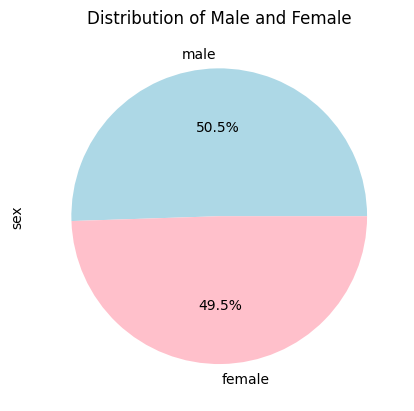

In [43]:
sex_counts = df['sex'].value_counts()

labels = sex_counts.index.tolist()
sizes = sex_counts.tolist()
colors = ['lightblue', 'pink']

sex_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])


plt.title("Distribution of Male and Female")
plt.show()

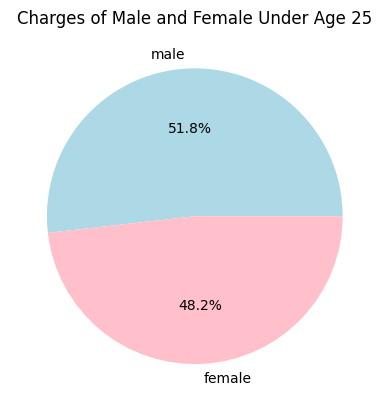

In [44]:
male_25 = df[(df['sex'] == 'male') & (df['age'] < 25)]['charges'].value_counts()

female_25 = df[(df['sex'] == 'female') & (df['age'] < 25)]['charges'].value_counts()


labels = ['male', 'female']
sizes = [male_25.sum(), female_25.sum()]
colors = ['lightblue', 'pink']

plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)


plt.title("Charges of Male and Female Under Age 25")
plt.show()


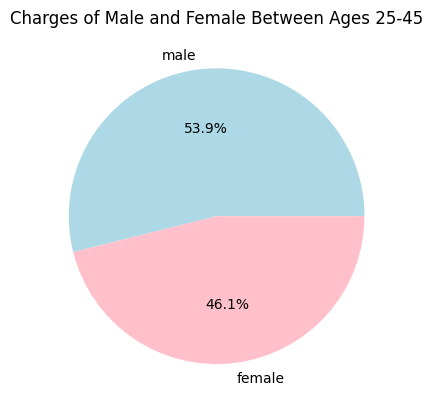

In [45]:
male_25_50 = df[(df['sex'] == 'male') & (df['age'] >= 25) & (df['age'] <= 45)]['charges'].mean()
female_25_50 = df[(df['sex'] == 'female') & (df['age'] >= 25) & (df['age'] <= 45)]['charges'].mean()


labels = ['male', 'female']
sizes = [male_25_50.sum(), female_25_50.sum()]
colors = ['lightblue', 'pink']

plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)


plt.title("Charges of Male and Female Between Ages 25-45")
plt.show()

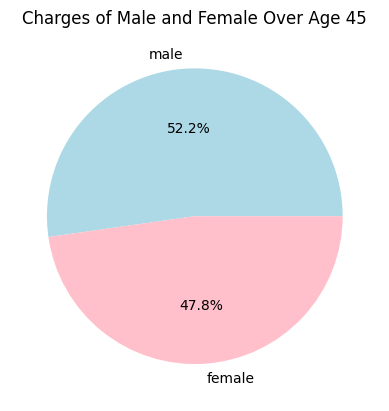

In [46]:
male_50 = df[(df['sex'] == 'male') & (df['age'] > 45)]['charges'].mean()
female_50 = df[(df['sex'] == 'female') & (df['age'] > 45)]['charges'].mean()

labels = ['male', 'female']
sizes = [male_50.sum(), female_50.sum()]
colors = ['lightblue', 'pink']

plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)


plt.title("Charges of Male and Female Over Age 45")
plt.show()

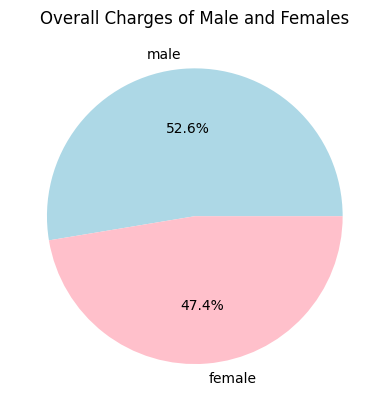

In [47]:
males = df[(df['sex'] == 'male') & (df['age'] >= 18) & (df['age'] <= 64)]['charges'].mean()
females = df[(df['sex'] == 'female') & (df['age'] >= 18) & (df['age'] <= 64)]['charges'].mean()


labels = ['male', 'female']
sizes = [males.sum(), females.sum()]
colors = ['lightblue', 'pink']

plt.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)


plt.title("Overall Charges of Male and Females")
plt.show()

In [48]:
df.head(10)

# df['region'].unique() = ['southwest', 'southeast', 'northwest', 'northeast']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


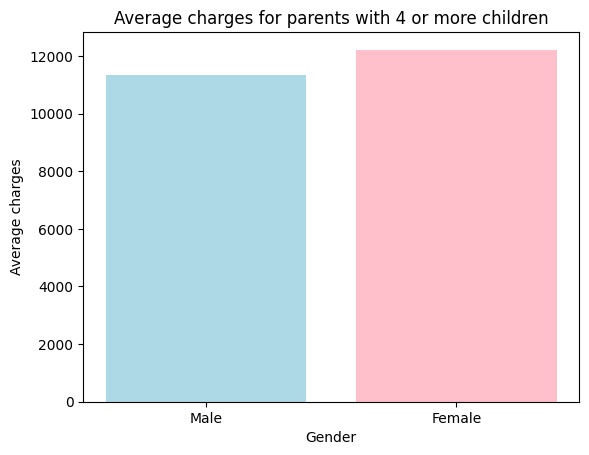

In [49]:
male_with_child = df[(df['sex'] == 'male') & (df['children'] >= 4 )]['charges'].mean()
female_with_child = df[(df['sex'] == 'female') & (df['children'] >= 4 )]['charges'].mean()

x_labels = ['Male', 'Female']
y_values = [male_with_child, female_with_child]
colors = ['lightblue', 'pink']

plt.bar(x_labels, y_values, color=colors)
plt.title('Average charges for parents with 4 or more children')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.show()

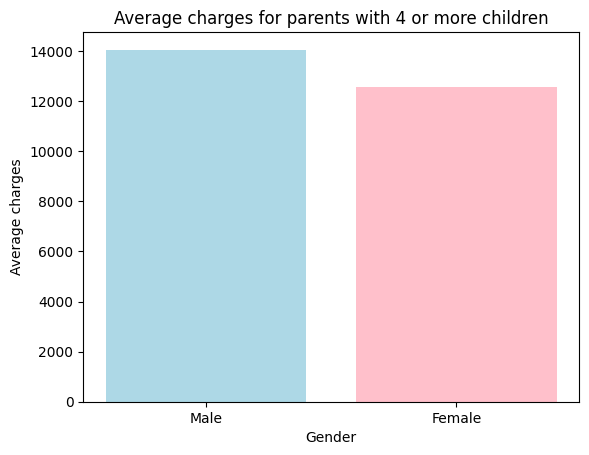

In [50]:
male_with_child_under4 = df[(df['sex'] == 'male') & (df['children'] < 4 )]['charges'].mean()
female_with_child_under4 = df[(df['sex'] == 'female') & (df['children'] < 4 )]['charges'].mean()

x_labels = ['Male', 'Female']
y_values = [male_with_child_under4, female_with_child_under4]
colors = ['lightblue', 'pink']

plt.bar(x_labels, y_values, color=colors)
plt.title('Average charges for parents with 4 or more children')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.show()

In [51]:
# This bar charts shows us that when males have more than 4 children, then their amount of insuarence charges passed the females in the same situation. However, all the other possibilities, males paid less than females.

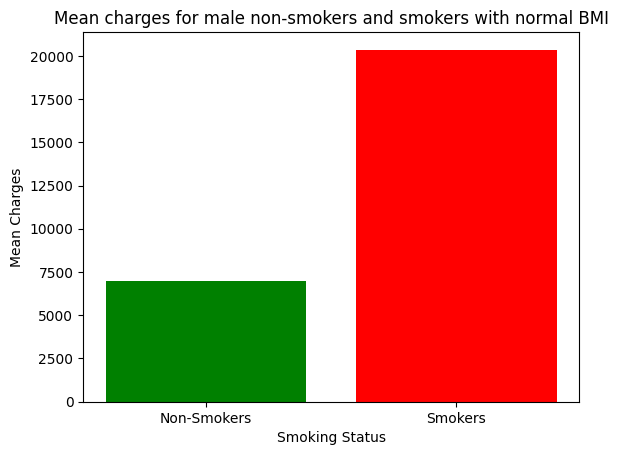

In [52]:
male_bmi_normal = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9) & (df['sex'] == 'male') & (df['smoker'] == 'no')]
male_bmi_normal_smoker = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9) & (df['sex'] == 'male') & (df['smoker'] == 'yes')]

mean_charges_normal = male_bmi_normal['charges'].mean()
mean_charges_smoker = male_bmi_normal_smoker['charges'].mean()

labels = ['Non-Smokers', 'Smokers']
values = [mean_charges_normal, mean_charges_smoker]
colors = ['green', 'red']

plt.bar(labels, values, color=colors)
plt.title('Mean charges for male non-smokers and smokers with normal BMI')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Charges')
plt.show()

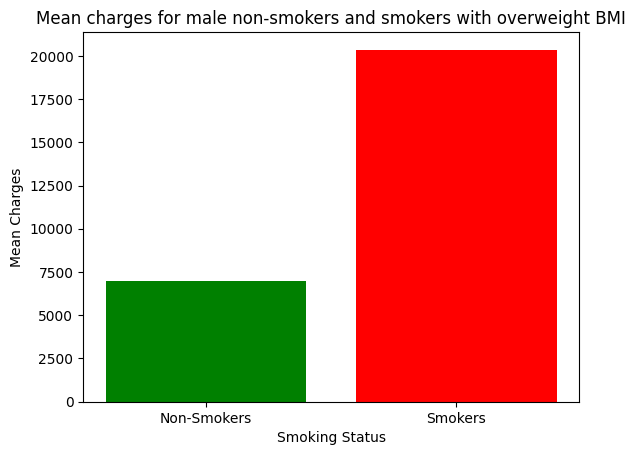

In [53]:
male_bmi_over = df[(df['bmi'] >= 24.9) & (df['sex'] == 'male') & (df['smoker'] == 'no')]
male_bmi_over_smoker = df[(df['bmi'] >= 24.9) & (df['sex'] == 'male') & (df['smoker'] == 'yes')]

mean_charges_over = male_bmi_normal['charges'].mean()
mean_charges_over_smoker = male_bmi_normal_smoker['charges'].mean()

labels = ['Non-Smokers', 'Smokers']
values = [mean_charges_over, mean_charges_over_smoker]
colors = ['green', 'red']

plt.bar(labels, values, color=colors)
plt.title('Mean charges for male non-smokers and smokers with overweight BMI')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Charges')
plt.show()

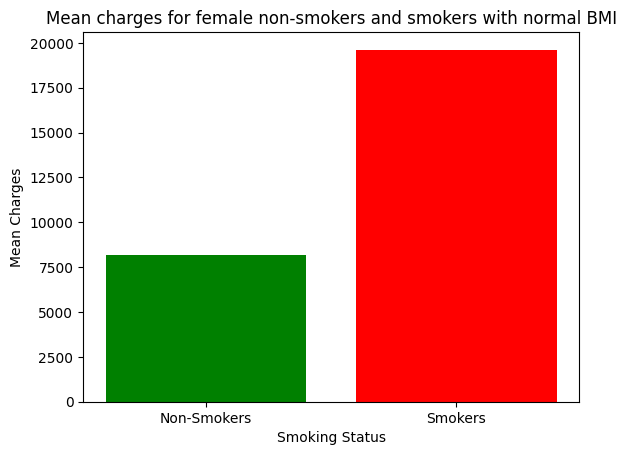

In [54]:
female_bmi_normal = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9) & (df['sex'] == 'female') & (df['smoker'] == 'no')]
female_bmi_normal_smoker = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9) & (df['sex'] == 'female') & (df['smoker'] == 'yes')]

mean_charges_normal2 = female_bmi_normal['charges'].mean()
mean_charges_smoker2 = female_bmi_normal_smoker['charges'].mean()

labels = ['Non-Smokers', 'Smokers']
values = [mean_charges_normal2, mean_charges_smoker2]
colors = ['green', 'red']

plt.bar(labels, values, color=colors)
plt.title('Mean charges for female non-smokers and smokers with normal BMI')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Charges')
plt.show()

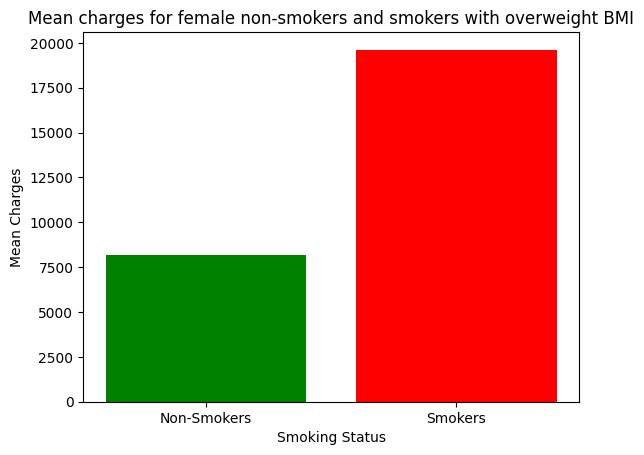

In [55]:
female_bmi_over = df[(df['bmi'] >= 24.9) & (df['sex'] == 'female') & (df['smoker'] == 'no')]
female_bmi_over_smoker = df[(df['bmi'] >= 24.9) & (df['sex'] == 'female') & (df['smoker'] == 'yes')]

mean_charges_over2 = female_bmi_normal['charges'].mean()
mean_charges_over_smoker2 = female_bmi_normal_smoker['charges'].mean()

labels = ['Non-Smokers', 'Smokers']
values = [mean_charges_over2, mean_charges_over_smoker2]
colors = ['green', 'red']

plt.bar(labels, values, color=colors)
plt.title('Mean charges for female non-smokers and smokers with overweight BMI')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Charges')
plt.show()

In [56]:
# As we can clearly see, smokoers in both genders have almost 3 times more health expenses. Non smokers have almost the same amount of expenses in both genders. 

In [57]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


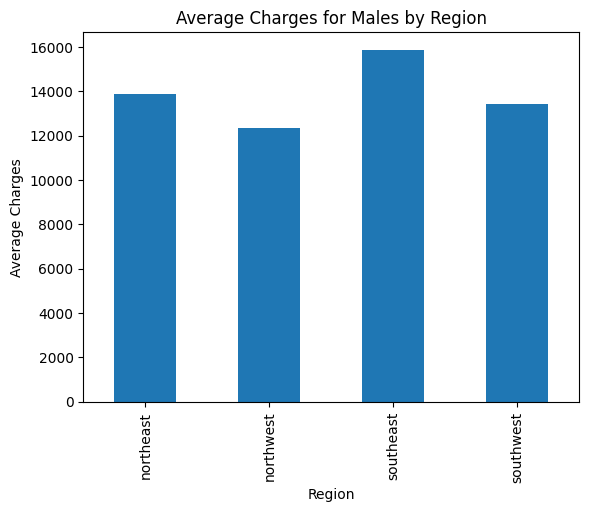

In [58]:
df_male = df[df['sex'] == 'male']

region_male = df_male.groupby('region')['charges'].mean()

region_male.plot(kind='bar')

plt.title('Average Charges for Males by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

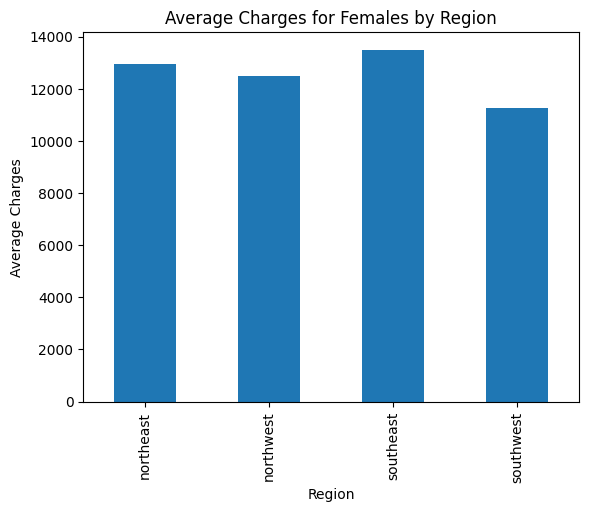

In [59]:
df_female = df[df['sex'] == 'female']

region_male = df_female.groupby('region')['charges'].mean()

region_male.plot(kind='bar')

plt.title('Average Charges for Females by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

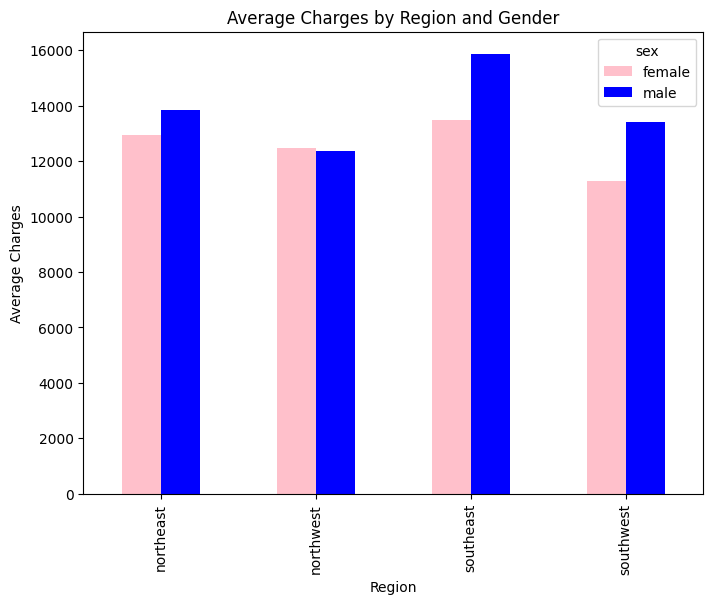

In [72]:
pivot = df.pivot_table(values = 'charges', index = 'region', columns = 'sex', aggfunc = 'mean')

colors = ['pink', 'blue']
pivot.plot(kind = 'bar', color = colors, figsize=(8,6))

plt.title('Average Charges by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

# As we can see from  the graph,  except region northwest, all males of other regions paid more than females. 

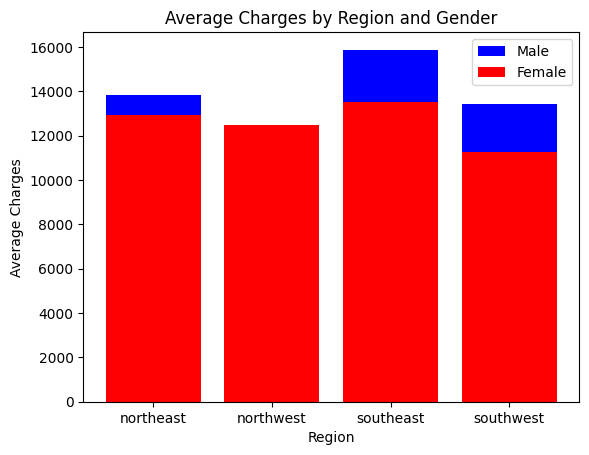

In [73]:
# This is an another form for the visualisation of the avarege charges by region and gender...
df_male = df[df['sex'] == 'male']
region_male = df_male.groupby('region')['charges'].mean()
df_female = df[df['sex'] == 'female']
region_female = df_female.groupby('region')['charges'].mean()

plt.bar(region_male.index, region_male, color='b', label='Male')
plt.bar(region_female.index, region_female, color='r', label='Female')
plt.title('Average Charges by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.legend()
plt.show()

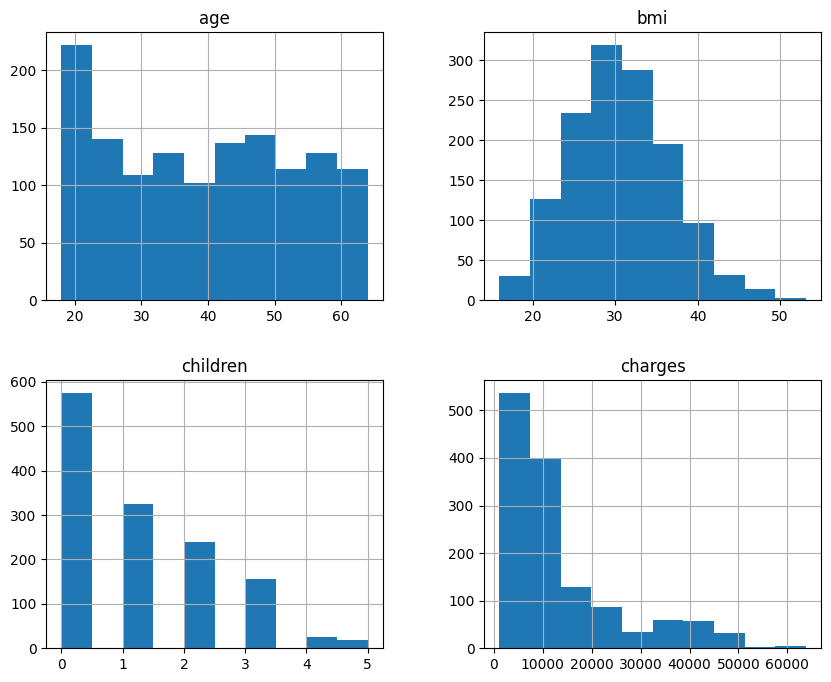

In [74]:
df.hist(figsize=(10, 8))
plt.show()